In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [2]:
base = 'D:/Simulation Data/SIMION/241118/Box/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10', 'run11', 'run12', 'run13', 'run14', 'run15', 'run16', 'run17']
ftype = '.csv'

In [25]:
effs = []
errs = []
splat_times = []
args = []

indeciess = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run30000':
        da = np.array([i for i in data.values[38:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[35:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    else:
        da = np.array([i for i in data.values[29:, 0:5] if i[0] != 'stopped after max_time'])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[30:, 0:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]

    splat_times.append(da.transpose()[1])
    indices = []
    indices2 = []
    effs_tmp = []
    args_tmp = []
    for l in range(100):
        i = 0 
        j = 0
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2])**2 + (k[3])**2)<0.001 and abs(k[4]) < 0.05:
                i+=1
                if n != 0:
                    indices.append(n+l*10-1)
            else:
                j +=1
                if n != 0:
                    indices2.append(n+l*10-1)
        eff = i/(i+j)
        effs_tmp.append(eff)
    indeciess.append(indices)
    #plt.figure()
    #plt.plot(np.transpose(da2)[2][indices], np.transpose(da2)[3][indices], 'o')
    #plt.plot(np.transpose(da2)[2][indices2], np.transpose(da2)[3][indices2], 'o')
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))

In [14]:
pressure = np.array([100, 10, 5, 2, 1, 3, 4])*1.33322
pressure2 = np.array([100, 10, 5, 2, 1, 3, 4, 200, 500, 1000])*1.33322

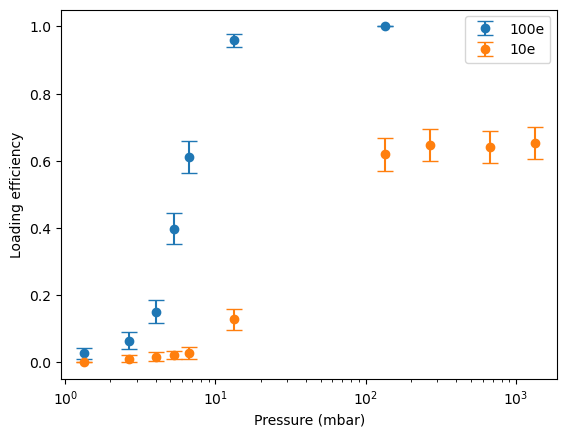

In [15]:
plt.errorbar(pressure, effs[:7], yerr = errs[:7], marker = 'o', linestyle = 'none', capsize = 6, label = '100e')
plt.errorbar(pressure2, effs[7:], yerr = errs[7:], marker = 'o', linestyle = 'none', capsize = 6, label = '10e')
plt.ylabel('Loading efficiency')
plt.xlabel('Pressure (mbar)')
plt.xscale('log')
plt.legend()

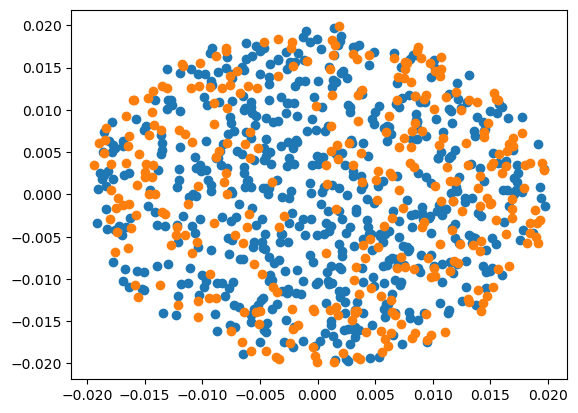

In [6]:
plt.plot(np.transpose(da2)[2][indices], np.transpose(da2)[3][indices], 'o')
plt.plot(np.transpose(da2)[2][indices2], np.transpose(da2)[3][indices2], 'o')

In [70]:
hists = []
bins = []
for n, i in enumerate(splat_times):
    hist, bin = np.histogram(i[indeciess[n]], bins = np.linspace(0, 100, 100))
    hists.append(hist)
    bins.append(bin)

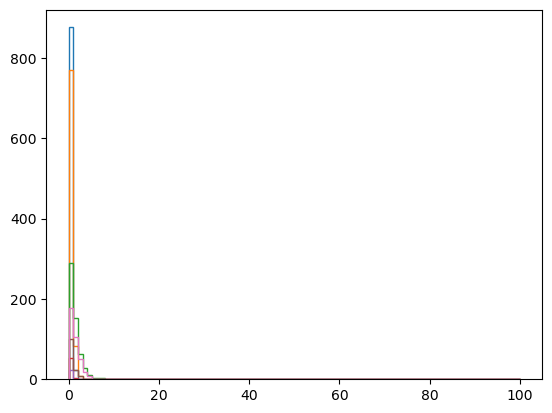

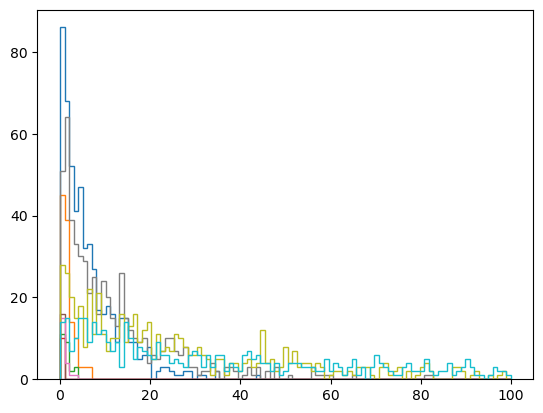

In [72]:
for i in range(len(hists[:7])):
    plt.stairs(hists[i], bins[i])

plt.figure()
for i in range(7, 7+len(hists[7:])):
    plt.stairs(hists[i], bins[i])

In [57]:
i = 12
print(np.mean(splat_times[i][indeciess[i]]))
print(np.mean(splat_times[i]))

0.40456277500000004
0.5141471024100001


In [58]:
len(indeciess[i])

16

In [63]:
fasts = []
for i in range(len(hists)):
    fasts.append(sum(hists[i][bins[i][1:]<100])/1000)

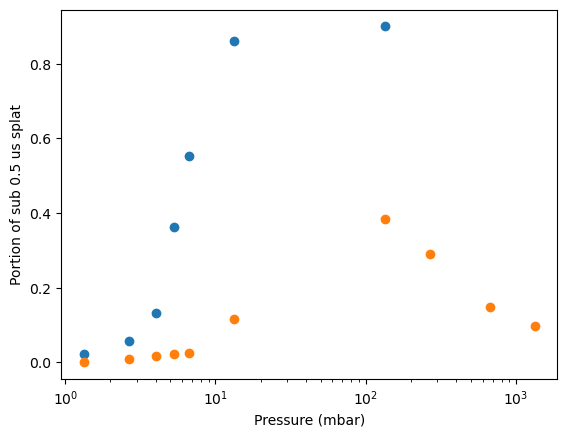

In [64]:
plt.plot(pressure, fasts[:7], 'o')
plt.plot(pressure2, fasts[7:], 'o')
plt.xlabel('Pressure (mbar)')
plt.ylabel('Portion of sub 0.5 us splat')
plt.xscale('log')